In [2]:
estimators

[('k_means_iris_8',
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0)),
 ('k_means_iris_3',
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
         n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
         random_state=None, tol=0.0001, verbose=0)),
 ('k_means_iris_bad_init',
  KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
         n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
         tol=0.0001, verbose=0))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


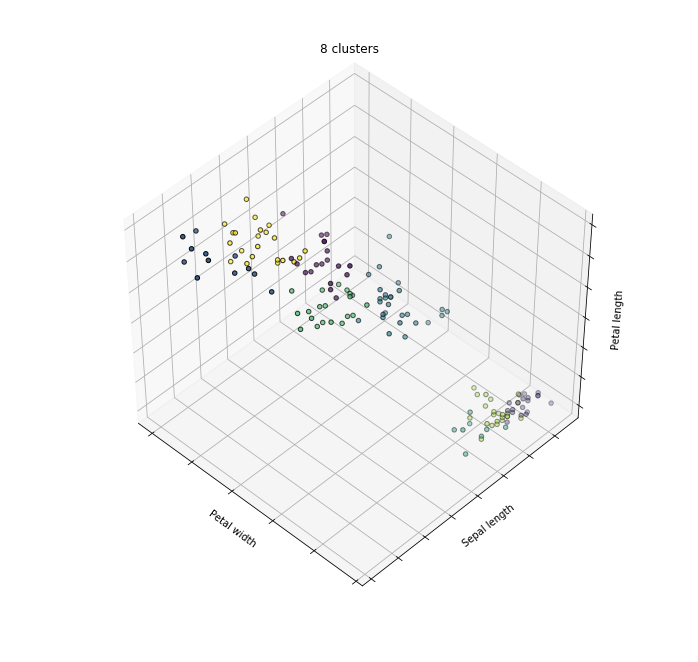

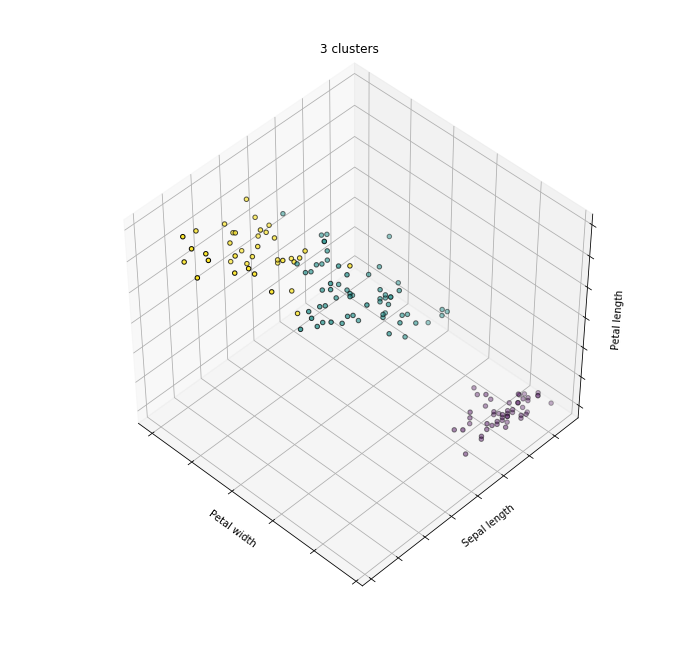

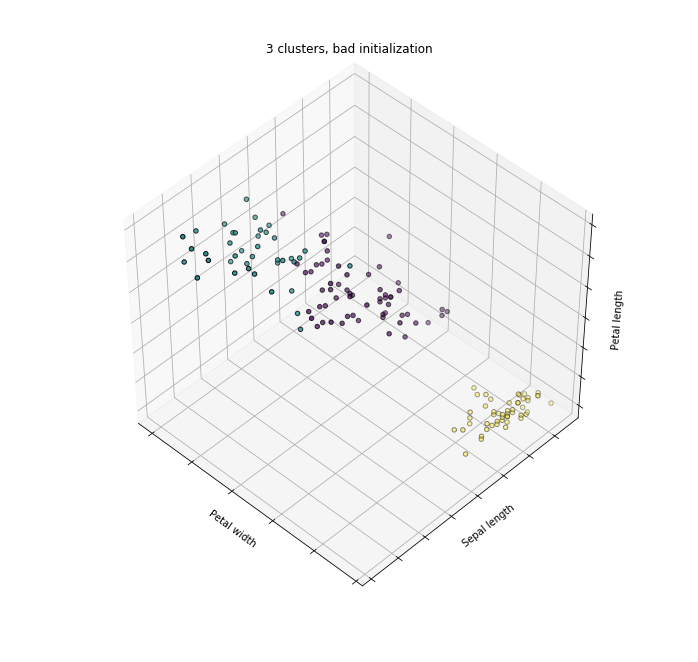

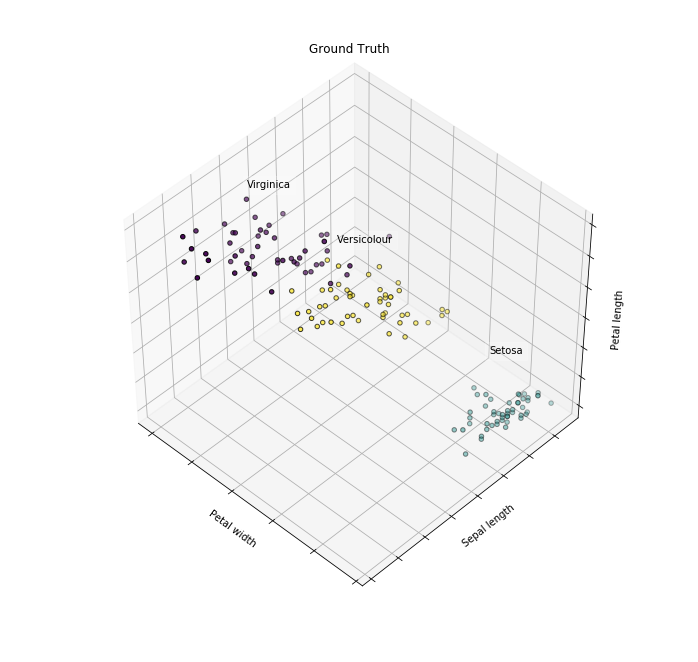

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

#On choisie une seed d'aléatoire
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target


#On fixe 3 estimateurs avec le nombre de clusters souhaitez 3 8 et des 
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

#ici c'est un peu compliqué car dans une même boucle nous allons créer 3 graphique à partir des résultats de nos 
#3 estimateurs.

##la partie "importante" pour le ML pur est le est.fit(X)
#c'est ici qu'il boucle 3 fois pour chacun de nos estimateurs pour générer des données de clustering
#Le reste du code concerne la mise en forme de nos graphique 3D. 

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(10, 9)) #Taille de la figure de base
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) #On fixe les bases de notre graphique 3D rect: donne les dimenssion du rectangle ()
    est.fit(X)                                               #elev et azim sert à fixer l'angle de vue du graphique
    labels = est.labels_ 

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], #On choisie nos 3 axes de résultat 
               c=labels.astype(np.float), edgecolor='k') #On fixe nos couleurs en labels (On spécifie qu'on les veux en float ?)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(10, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [45]:
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]
estimators
for name, est in estimators:
    est.fit(X)     
    print(est.labels_)

[1 6 6 6 1 1 6 1 6 6 1 6 6 6 1 1 1 1 1 1 1 1 6 1 6 6 1 1 1 6 6 1 1 1 6 6 1
 1 6 1 1 6 6 1 1 6 1 6 1 6 5 5 5 7 5 7 5 2 5 7 2 7 7 5 7 5 7 7 3 7 3 7 3 5
 5 5 5 5 5 2 2 2 7 3 7 5 5 5 7 7 7 5 7 2 7 7 7 5 2 7 0 3 4 0 0 4 7 4 0 4 0
 3 0 3 3 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [39]:
tab=np.array([[1,2,3],[3,4,5]])
tab

array([[1, 2, 3],
       [3, 4, 5]])

In [42]:
tab[:,0]

array([1, 3])

In [49]:
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
print(c)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12
fig.show()

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [48]:
len(y)

150